In [1]:
#前三個都是確認有沒有安裝pythouch
! pip install torch

In [2]:
import torch
import numpy as np

print('PyTorch version:', torch.__version__)

np.set_printoptions(precision=3)

PyTorch version: 2.1.0+cpu


In [6]:
#到這裡都是安裝
!python -c "import torch; print(torch.__version__)"

2.1.0+cpu


In [7]:
#設定A串列 B陣列，讓t_a變成tensor張量，t_b是從陣列中創造一個張量，方法差不多
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)

t_a = torch.tensor(a)
t_b = torch.from_numpy(b)

print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [8]:
#確認是否是tensor
torch.is_tensor(a), torch.is_tensor(t_a)

(False, True)

In [9]:
#全部變成1，有2列3行，
t_ones = torch.ones(2, 3)

t_ones.shape

torch.Size([2, 3])

In [10]:
print(t_ones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [11]:
#給rand_tensor一個隨機數字， 2列3行
rand_tensor = torch.rand(2,3)

print(rand_tensor)

tensor([[0.2278, 0.2082, 0.5681],
        [0.1322, 0.5658, 0.0242]])


In [12]:
#將資料型態轉成64位元的整數
t_a_new = t_a.to(torch.int64)

print(t_a_new.dtype)

torch.int64


In [24]:
#建立二維張量，裡面用rand創造1~0之間的數
t = torch.rand(3, 5)

#裡面的0跟1是第一個維度跟第二個維度，
t_tr = torch.transpose(t, 0,1)
print(t.shape, ' --> ', t_tr.shape)
print(t,"\n")
print(t_tr)


torch.Size([3, 5])  -->  torch.Size([5, 3])
tensor([[0.6177, 0.0977, 0.1395, 0.2228, 0.0295],
        [0.2424, 0.9372, 0.8005, 0.4346, 0.2588],
        [0.0016, 0.2689, 0.0907, 0.5803, 0.8379]]) 

tensor([[0.6177, 0.2424, 0.0016],
        [0.0977, 0.9372, 0.2689],
        [0.1395, 0.8005, 0.0907],
        [0.2228, 0.4346, 0.5803],
        [0.0295, 0.2588, 0.8379]])


In [25]:
#t
t = torch.zeros(30)

t_reshape = t.reshape(5, 6)

print(t_reshape.shape)
print(t)

torch.Size([5, 6])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.])


In [15]:
#創造一個5維的t，其中裡面有一個維度只有1個元素，所以之後如果有類似的情況，可以把它壓縮調，提升速度
t = torch.zeros(1, 2, 1, 4, 1)
#壓縮調第二個維度
t_sqz = torch.squeeze(t, 2)

print(t.shape, ' --> ', t_sqz.shape)

torch.Size([1, 2, 1, 4, 1])  -->  torch.Size([1, 2, 4, 1])


In [26]:
#設定隨機種子1
torch.manual_seed(1)
#生成隨機rand，做2倍運算-1
t1 = 2 * torch.rand(5, 2) - 1
print(t1)

#t2做常態分佈中生成的隨機數(平均值0 標準差1 大小5列2行)
t2 = torch.normal(mean=0, std=1, size=(5, 2))
print(t2)

In [27]:
#t1 t2做相乘
t3 = torch.multiply(t1, t2)
print(t3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


In [28]:
#t1做平均
t4 = torch.mean(t1, axis=0)
print(t4)

tensor([-0.1373,  0.2028])


In [29]:
#t1跟t2轉置後座相乘
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))

print(t5)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


In [30]:
#t1轉置後跟t2做相乘
t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)

print(t6)

tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])


In [31]:
#ord二維的范數，dim是維度維1
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)

print(norm_t1)

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


In [33]:
#先做t1.numpy()轉成陣列，在np.square取平方，在np.sum加起來，在np.sqrt開根號
np.sqrt( np.sum(np.square(t1.numpy()), axis=1))

array([0.678, 0.508, 1.116, 0.549, 0.185], dtype=float32)

In [34]:
#下面4個是做array list tensor的各種轉換
#list串列
list1=[1,2,3]

arr1=np.array(list1)
print(list1)
print(arr1)

[1, 2, 3]
[1 2 3]


In [35]:
list2=arr1.tolist()
print(list2)


[1, 2, 3]


In [36]:
tensor1 = torch.tensor(list1)
tensor2 = torch.from_numpy(arr1)
print(tensor1)
print(tensor2)

tensor([1, 2, 3])
tensor([1, 2, 3], dtype=torch.int32)


In [37]:
#到這邊都是轉換
arr3=tensor1.numpy()
list3=tensor2.numpy().tolist()
print(arr3)
print(list3)

[1 2 3]
[1, 2, 3]


In [42]:
#固定隨機種子1
torch.manual_seed(1)
#生成6個亂數
t = torch.rand(6)

print(t)
#把t拆成3個子張量，0.7576, 0.2793兩個一組 0.4031, 0.7347兩個一組 0.0293, 0.7999兩個一組
t_splits = torch.chunk(t, 3)
print(t_splits)
#串列裡面有3組陣列，分別是t_splits裡面的子張量，存入item裡面，並轉呈numpy陣列
[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])
(tensor([0.7576, 0.2793]), tensor([0.4031, 0.7347]), tensor([0.0293, 0.7999]))


[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

In [39]:
#跟上面一樣，但是是分成3個2個的子張量
torch.manual_seed(1)
t = torch.rand(5)

print(t)

t_splits = torch.split(t, split_size_or_sections=[3, 2])
 
[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


[array([0.758, 0.279, 0.403], dtype=float32),
 array([0.735, 0.029], dtype=float32)]

In [40]:

A = torch.ones(3)
B = torch.zeros(2)
#C堆疊A跟B的張量
C = torch.cat([A, B], axis=0)
print(C)

tensor([1., 1., 1., 0., 0.])


In [41]:
A = torch.ones(3)
B = torch.zeros(3)
#S堆疊A跟B，會以[A,B],[A,B]去堆疊
S = torch.stack([A, B], axis=1)
print(S)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


In [43]:
from torch.utils.data import DataLoader
#創造0~5的序列，類型float32
t = torch.arange(6, dtype=torch.float32)
#把t放入加載器
data_loader = DataLoader(t)

In [44]:
#把item裡面得資料放入加載器
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [45]:
#batch_size=3 每批3個資料 ， drop_last=False 最後的樣本不要丟掉
data_loader = DataLoader(t, batch_size=3, drop_last=False)
#把每個tensor按照編號i加入
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


In [46]:
#資料建置
from torch.utils.data import Dataset

class JointDataset(Dataset):
    #self.x 跟 x 是不一樣的，但是資料相同
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        #回傳長度
        return len(self.x)
    def __getitem__(self, idx):
        回傳資料內的資料
        return self.x[idx], self.y[idx]

In [47]:
torch.manual_seed(1)
#建立t_x跟t_y資料，t_x是0~1之間4列3行
t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)
joint_dataset = JointDataset(t_x, t_y)

# Or use TensorDataset directly
from torch.utils.data import TensorDataset
joint_dataset = TensorDataset(t_x, t_y)

for example in joint_dataset:
    print('  x: ', example[0], 
          '  y: ', example[1])

  x:  tensor([0.7576, 0.2793, 0.4031])   y:  tensor(0)
  x:  tensor([0.7347, 0.0293, 0.7999])   y:  tensor(1)
  x:  tensor([0.3971, 0.7544, 0.5695])   y:  tensor(2)
  x:  tensor([0.4388, 0.6387, 0.5247])   y:  tensor(3)


In [48]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], 
              '\n         y:', batch[1])
        
for epoch in range(2):
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], 
              '\n         y:', batch[1])

batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
         y: tensor([2, 0])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])
epoch 1
batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([0, 2])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])
epoch 2
batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([3, 2])
batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
         y: tensor([0, 1])


In [4]:
#抓三張貓狗的照片放到cat_dog_images內，file_list會讀取內照片
import pathlib

imgdir_path = pathlib.Path('cat_dog_images')

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)

['cat_dog_images\\cat01.jpg', 'cat_dog_images\\cat02.jpg', 'cat_dog_images\\cat03.jpg', 'cat_dog_images\\dog01.jpg', 'cat_dog_images\\dog02.jpg', 'cat_dog_images\\dog03.jpg']


Image shape:  (225, 225, 3)
Image shape:  (224, 225, 3)
Image shape:  (183, 276, 3)
Image shape:  (300, 168, 3)
Image shape:  (183, 275, 3)
Image shape:  (734, 1100, 3)


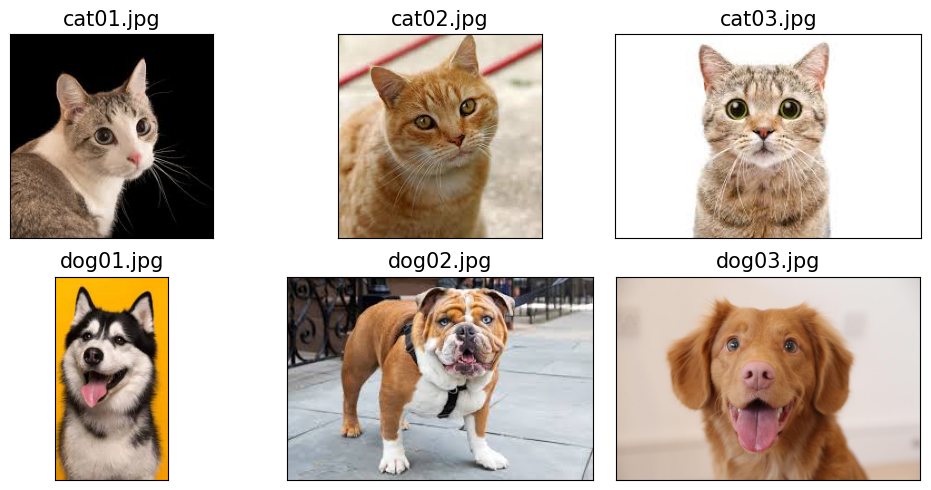

In [6]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np

#設定fig大小，寬10英寸高5英吋
fig = plt.figure(figsize=(10, 5))
#開始設定每張照片的內容
for i, file in enumerate(file_list):
    #img會打開每個file的資料
    img = Image.open(file)
    #顯示img陣列裡面的長寬跟RGB(3)
    print('Image shape: ', np.array(img).shape)
    #ax會加入2列3行的圖片，然後會i+1載入6張
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
    
#plt.savefig('figures/12_03.pdf')
plt.tight_layout()
plt.show()